In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def random_walk(n):
    return [np.random.randint(0,11) for _ in range(n)]

def height_in_3tree(walk):
    height = 0
    
    for step in walk:
        if int(step/4) == 0 and height > 0:
            height -= 1
        else:
            height += 1
    
    return height

def walk_goes_higher_than(d, walk):
    return height_in_3tree(walk) > d

In [3]:
def UGW(degs, probs, height):
    normalization = sum([ d * p for d, p in zip(degs, probs) ])
    offspring_probs = [ d * p / normalization for d, p in zip(degs, probs) ]
    
    T = nx.Graph()
    T.add_node('')
    
    root_deg = np.random.choice(degs, p=probs)
    current_level = [ str(i) for i in range(root_deg) ]
    T.add_edges_from([ ('', v) for v in current_level ])
    
    current_height = 1
    while current_height <= height:
        next_level = []
        
        for v in current_level:
            v_deg = np.random.choice(degs, p=offspring_probs)
            new_nodes = [ v + str(i) for i in range(1, v_deg)]
            next_level.extend(new_nodes)
            T.add_edges_from([ (v, u) for u in new_nodes ])
        
        current_level = next_level
        current_height += 1
    
    return T

In [4]:
def walk_in_tree(walk, tree):
    current_node = ''
    
    for step in walk:
        reduced_step = int(step * tree.degree[current_node] / 12)
            
        if reduced_step == 0 and current_node != '':
            next_node = current_node[:-1]
        else:
            next_node = current_node + str(reduced_step)
        
        current_node = next_node
    
    return current_node

In [16]:
def ball(graph, root, radius):
    b = nx.Graph()
    b.add_edges_from(nx.bfs_edges(graph, root, depth_limit=radius))
    b.nodes[root]['root'] = True
    return b

def ball_node_match(n1, n2):
    return n1 == n2

In [44]:
def mappings(xs, ys):
    if len(xs) == 0:
        return [[]]
    else:
        x, *zs = xs
        
        smaller_mappings = mappings(zs, ys)
        return [
            [(x,y)] + sm
            for y in ys
            for sm in smaller_mappings
        ]

In [54]:
def possible_balls(degs, radius):
    if radius == 1:
        balls = []
        
        for d in degs:
            b = nx.Graph()
            b.add_edges_from([('', str(i)) for i in range(d)])
            b.nodes['']['root'] = True
            balls.append(b)
            
        return balls
    
    else:
        smaller_balls = possible_balls(degs, radius-1)
        balls = []
        
        for sb in smaller_balls:
            leaves = [node for node in sb if len(node) == radius-1]
            
            for m in mappings(leaves, degs):
                b = sb.copy()
                
                for l, d in m:
                    b.add_edges_from([(l, l+str(i)) for i in range(1,d)])
                
                if all([not nx.is_isomorphic(b, x, node_match=ball_node_match) for x in balls]):
                    balls.append(b)

        return balls

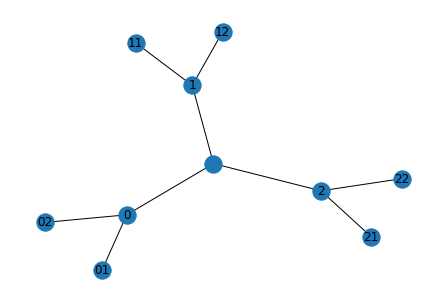

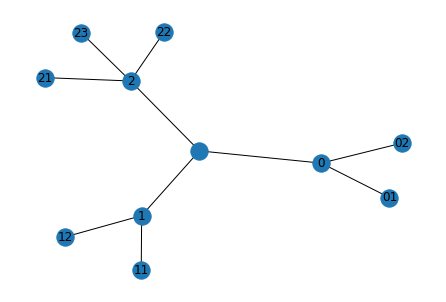

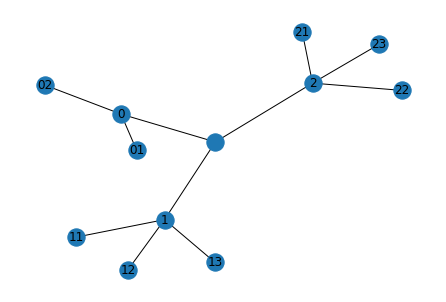

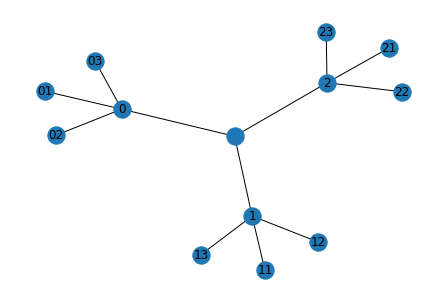

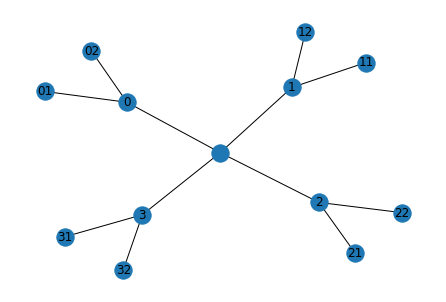

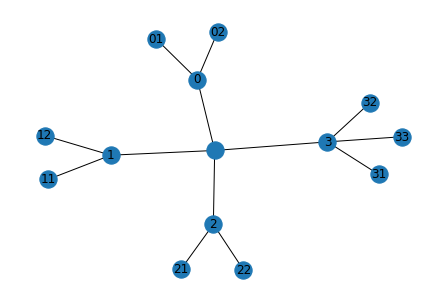

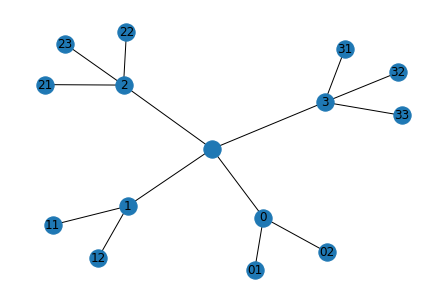

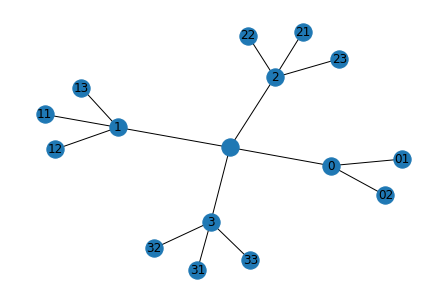

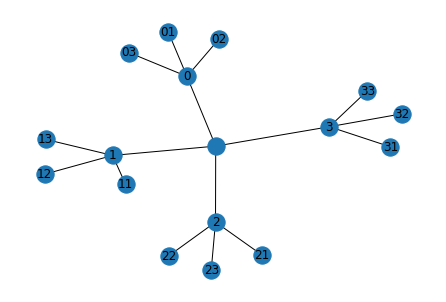

In [53]:
i = 0
for x in possible_balls([3,4],2):
    plt.figure(i)
    i += 1
    nx.draw(x, with_labels=True)

In [46]:
len(mappings(range(3),range(4)))

64

In [23]:
t1 = nx.Graph()
t1.add_edges_from([(1,2), (2,3)])
t1.nodes[1]['root'] = True

t2 = nx.Graph()
t2.add_edges_from([('a','b'), ('b','c')])
t2.nodes['c']['root'] = False

nx.is_isomorphic(t1,t2, node_match=ball_node_match)

False

In [5]:
w = random_walk(3)
w

[0, 8, 9]

In [7]:
walk_in_tree(w, t)

'022'

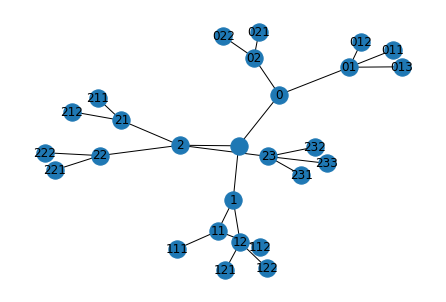

In [6]:
t = UGW([3,4],[0.5,0.5],2)
nx.draw(t, with_labels=True)

In [21]:
t.nodes['311']['root'] = True
t.nodes['311']

{'root': True}

{'root': True}

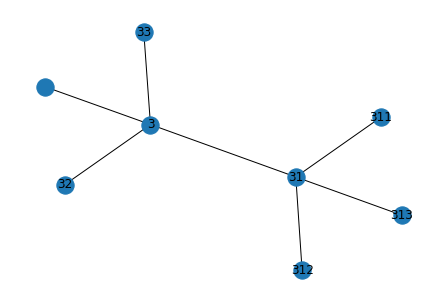

In [27]:
g = ball(t,'311',3)
nx.draw(g, with_labels=True)
g.nodes['311']

In [22]:
for node in g:
    print(node)

312
31
3
311
313


In [13]:
a = { 'root' : True}
b = { 'root' : True}

In [10]:
a == b

True

In [14]:
c = {}
d = {}

In [15]:
a == c

False

In [26]:
for a in range(10):
    if a % 2 == 0:
        print(a)

0
2
4
6
8


In [28]:
a = [1,2]
a.append(3)
a

[1, 2, 3]

In [41]:
[1] + [2]

[1, 2]